# Une machine qui apprend seule

L’ensemble des apprentissages que nous avons réalisés jusqu’à présent sont dits supervisés, car nous avons indiqué à la machine la valeur à prédire pour chaque cas d’apprentissage : 

Nous allons à présent découvrir comment il est possible de laisser la machine se débrouiller toute seule pour apprendre à classifier une observation donnée à partir d’une liste d’observations dont elle ne connaît pas le groupe d’appartenance. "Voici une liste d’observations : peux-tu en déduire des groupes de classification ? Si oui, voici une observation : à quel groupe appartient-elle ?"

# Acquisition de données d’apprentissage

Comme pour tout apprentissage, nous devons disposer de données. La machine devra être capable de faire la distinction entre une cerise et un abricot à partir du poids et de la taille de chaque fruit.

TABLEAUX-CALIBRES-FRUITS-2.pdf

<h5>script Python pour nous aider:</h5>

Nous allons créer un script Python qui va nous permettre de générer un nombre de cerises et d’abricots en fonction des caractéristiques qui leur sont propres.

Après avoir créé un nouveau projet et installé les modules Pandas, Matplotlib et Scikit-learn, nous vous invitons à saisir ces quelques lignes de code dans un nouveau fichier de script que nous nommerons <b>generationFruits</b>

In [1]:
#---- IMPORT DES MODULES -- 
import random 
import pandas as pnd 
import matplotlib.pyplot as plt

#---- CARACTERISTIQUES------ 
 
#CERISES 
caracteristiquesCerises = [[17,19,1,5],[20,21,5,6],[22,23,6,7],[24,25,7,8.5],[26,27,8.5,10],[28,29,10,11.5]] 
 
#ABRICOTS 

caracteristiquesAbricots2 =  [[40,44,41],[45,49,54],[50,54,74],[55,59,100]]
caracteristiquesAbricots =  [[35,39,27],[40,44,41],[45,49,54],[50,54,74],[55,59,100]]

#Nous pouvons ensuite définir le nombre de fruits à générer :

#GENERATION DES DONNEES
# [DIAMETRE, POIDS]
nombreObservations = 2000

<h4>Nous générerons 2000 cerises et 2000 abricots.</h4>

In [2]:
#Génération des cerises 
#choix au hasard d'une caractéristique 
#Génération d'un diamètre
#Génération d'un poids 
cerises = []
for iteration in range(nombreObservations):
    #choix au hazard d'une caracteristique
    cerise = random.choice(caracteristiquesCerises)
    
    #Generation d'un diametre
    diametre = round(random.uniform(cerise[0], cerise[1]),2)
    
    #Generation d'un poids
    poids = round(random.uniform(cerise[2], cerise[3]),2)
    
    cerises.append([diametre, poids])
    

# print(cerises)

# caracteristiques   DIAMETRE       POIDS
# [22, 23, 6, 7] :    22.35    -    6.59

# cerises : [[22.35, 6.59], [24.33, 7.38] ........ 

In [3]:
#Génération des abricots 
#choix au hasard d'une caractéristique
#Génération d'un diamètre
#Génération d'un poids 
abricots = []
for iteration in range(nombreObservations):
    #choix au hazard d'une caracteristique
    abricot = random.choice(caracteristiquesAbricots)
    
    #Generation d'un diametre
    diametre = round(random.uniform(abricot[0], abricot[1]),2)
    
    #Generation d'un poids
    borneMinPoids = abricot[2] * 0.90
    borneMaxPoids = abricot[2] * 1.10
    poids = round(random.uniform(borneMinPoids, borneMaxPoids),2)
    
    abricots.append([diametre, poids])
    
# caracteristiques   DIAMETRE       POIDS
# [40, 44, 41] :      43.29    -    41.24
    
# abricots : [[43.29, 41.24], [48.2, 49.96] ..........

<p>Pour chaque cerise et chaque abricot, une caractéristique est choisie au hasard. Les diamètres minimal et maximal de cette caractéristique sont ensuite récupérés et le diamètre est généré aléatoirement dans cette plage.</p>
<p>
Nous procédons de la même façon pour le poids de la cerise. Comme nous ne disposons que d’un poids moyen pour l’abricot par caractéristique, nous choisissons de créer aléatoirement un poids compris entre le poids moyen -10 % et le poids moyen + 10 %. Le diamètre et le poids sont ensuite stockés dans un tableau.    
</p>

Enfin, nous concaténons les tableaux de cerises et d’abricots et nous mélangeons le résultat.

Notre jeu d’observation est à présent constitué. Nous pouvons le sauvegarder au format CSV à l’aide du module Panda et de la fonction <b>to_csv</b> du <b>Dataframe. </b>

In [4]:
#Constitution des observations
#Mélange des observations 
#save csv

In [5]:
#Constitution des observations
fruits = cerises+abricots

#Mélange des observations
random.shuffle(fruits)

#Sauvegarde des observations dans un fichier
dataFrame = pnd.DataFrame(fruits)

dataFrame.to_csv("datas/fruits.csv", index=False,header=False)

# Algorithme des K-Means (K-Moyennes)

In [6]:
# Visualiser les données

In [7]:
#Chargement des données 
fruits = pnd.read_csv("datas/fruits.csv",names=['DIAMETRE','POIDS'], header=None) 

<AxesSubplot:xlabel='DIAMETRE', ylabel='POIDS'>

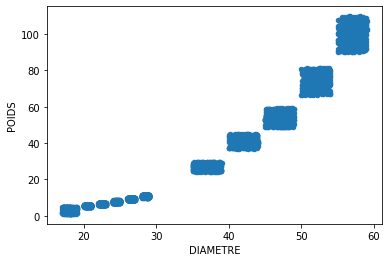

In [8]:
#Visualisation graphique des données  scatter
# fruits.plot.s
# fruits.plot(kind='scatter', x='DIAMETRE', y='POIDS')
#Visualisation graphique des données 
fruits.plot.scatter(x="DIAMETRE",y="POIDS") 

# Laisser la machine classifier seule

Place maintenant à la machine. Saura-t-elle classer correctement les cerises et les abricots ?


<h3>l’algorithme K-Mean</h3>

In [9]:
from sklearn.cluster import KMeans 
modele=KMeans(n_clusters=2) # Nous lui avons indiqué le nombre de clusters à déterminer.

In [10]:
# phase d’apprentissage :
modele.fit(fruits) 

KMeans(n_clusters=2)

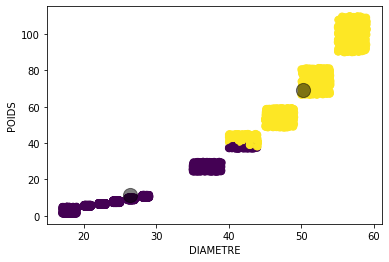

In [11]:
# phase de prédictions 
predictions_kmeans = modele.predict(fruits)

#Affichage de la clusterisation 
plt.scatter(fruits.DIAMETRE, fruits.POIDS, c=predictions_kmeans, 
s=50, cmap='viridis') # couleur 'color map'
plt.xlabel("DIAMETRE") 
plt.ylabel("POIDS") 

#Affichage des centroïdes 
centers = modele.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, 
alpha=0.5) 
plt.show() 

In [12]:
# joblib
import joblib
fichier = 'datas/modele_kmeans.mod'
joblib.dump(modele, fichier)

['datas/modele_kmeans.mod']

In [13]:
# Réaliser des classifications
# nouveau script Python (classifications.py)

#Chargement du modèle 

#CERISE: 26.98 mm de diamètre ,8.75 grammes 
#ABRICOT: 55.7  mm de diamètre , 102.16 grammes 

# print("Numéro de cluster des cerises: predict")

# -----

# print("Numéro de cluster des abricots: predict")
# Numéro de cluster des cerises : [1] 
# Numéro de cluster des abricots : [0] 

# Étant donné que les clusters sont déterminés par la machine, il se peut que vous ayez des résultats différents, à savoir le groupe 1 pour les abricots et le groupe 0 pour les cerises.


In [14]:
cerise = [[26.98,8.75]]

numCluster = modele.predict(cerise)
if int(numCluster)==0:
    print("C'est un abricot !")
else:
    print("C'est une cerise")
    
abricot = [[55.7,102.16]]

numCluster = modele.predict(abricot)
if int(numCluster)==0:
    print("C'est un abricot !")
else:
    print("C'est une cerise")
    
    

C'est un abricot !
C'est une cerise


 1 - Une fois les groupes déterminés, nous pouvons écrire un code indiquant que les données que nous utilisons sont celles d’une cerise ou d’un abricot.<br>
Ce code étant bien entendu à adapter en fonction des numéros de clusters.



# utiliser la méthode elbow pour trouver le nombre optimal des clusters

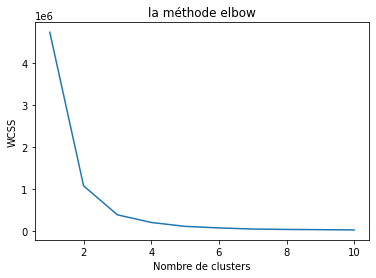

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(fruits)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('la méthode elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

# Algorithme de mélanges Gaussian Mixture Model (GMM)